# Visualization of the Chi-Square distribution with independent standard normal variables:

In [1]:
import numpy as np

In [30]:
sample1 = np.random.normal(0, 1, 100)
sample2 = np.random.normal(0, 1, 100)
sample3 = np.random.normal(0, 1, 100)
sample4 = np.random.normal(0, 1, 100)
sample5 = np.random.normal(0, 1, 100)
sample6 = np.random.normal(0, 1, 100)
sample7 = np.random.normal(0, 1, 100)

In [31]:
legang=["for x","for y","for z","for p","for q","for r"]

In [58]:
x=sample1**2
y=sample2**2
z=sample3**2
o=sample4**2
p=sample5**2
q=sample6**2
r=sample7**2


In [59]:
import seaborn as sns 
import matplotlib.pyplot as plt

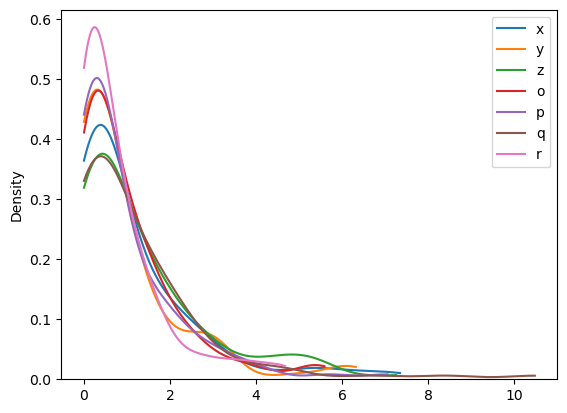

In [60]:
arr = [x, y, z,o, p, q, r]
legend = ['x', 'y', 'z', 'o','p', 'q', 'r']

for i in arr:
    sns.kdeplot(i, clip=(i.min(), i.max()))

plt.legend(legend)
plt.show()

# How to find the p-value with respect to Chi-Square statistic and degree of freedom:

In [50]:
import scipy.stats as stat
chi_stat=12.19
df=4
p_value=stat.chi2.sf(chi_stat,df)
print(f"p-value : {p_value}")

p-value : 0.015992911448370114


# Case study of Chi-Square Test:

In [35]:
import pandas as pd

In [36]:
df=pd.read_csv("train.csv")

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Goodness of Fit:

# Now we are going to check if the distribution of passengers among the classes is uniform or not in titanic.

So lets construct the null hypothesis and alternative hypothesis.
Null hypothesis(Ho):The Distrbution of passengers among the classes is uniform in titanic.
Alternative hypothesis(Ha):The Distribution of passengers among the classes is not unioform in titanic.

# Observed value 

In [38]:
obderved_value=df["Pclass"].value_counts().sort_index()
obderved_value

1    216
2    184
3    491
Name: Pclass, dtype: int64

Now we have to calculate the expected value of three class

# Expected value

As they follow the uniform Distribution then the number of passengers in each class should be equal.
expected value for each class is

In [39]:
expected_value=[len(df)/3]*3
expected_value

[297.0, 297.0, 297.0]

In [40]:
import scipy.stats as stat
from scipy.stats import chisquare

In [41]:
chi_2,p_value=chisquare(obderved_value,expected_value)

In [42]:
print(f"the value of the chi-squre is{chi_2}")
print(f"\n p-value is {p_value}")

the value of the chi-squre is191.8047138047138

 p-value is 2.2394202231028854e-42


In [43]:
alpha = 0.05
if p_value>alpha:
    print("we cannot reject the null hypothesis.\nso The distribution of passengers among the classes is uniform in titanic")
else:
    print("we reject our null hypothesis.\nso The distribution of passengers among the classes is not uniform in titanic")

we reject our null hypothesis.
so The distribution of passengers among the classes is not uniform in titanic


# Test for independance:

We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the passenger class or not

null hypothesis(Ho):the survival rate of passengers is independent of the passenger class.
alternative hypothesis(Ha):the survival rate of passengers is not independent of the passenger class.

# 1. we have to contruct the contingency table based on the observations.


In [44]:
contingency_table=pd.crosstab(df["Survived"],df["Pclass"])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [45]:
from scipy.stats import chi2_contingency

In [46]:
chisqr_val,p_value,dof,expected_table=chi2_contingency(contingency_table)

In [47]:
print("chi-2 statistic :",chisqr_val)
print("P-value :",p_value)
print("expected contigency table :\n",expected_table)

chi-2 statistic : 102.88898875696056
P-value : 4.549251711298793e-23
expected contigency table :
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


we reject our null hypothesis.
so the survival rate of passengers is not independent of the passenger class.

In [48]:
alpha = 0.05
if p_value > alpha:
    print("We cannot reject the null hypothesis.\nSo, the survival rate of passengers is independent of the passenger class.")
else:
    print("We reject the null hypothesis.\nSo, the survival rate of passengers is not independent of the passenger class.")


We reject the null hypothesis.
So, the survival rate of passengers is not independent of the passenger class.
